In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

<h3> 
Principal component analysis (PCA)

Goal: reduce the number of feture but preserving information about the data (or at least a significant part)

How? Idea: Choose those directions where there is the greatest variability.
How? By projecting the data onto the eigenvectors of the covariance matrix corresponding to the largest eigenvalues.

Theorem: If the matrix is symmetric, then the eigenvectors corresponding to different eigenvalues are perpendicular.

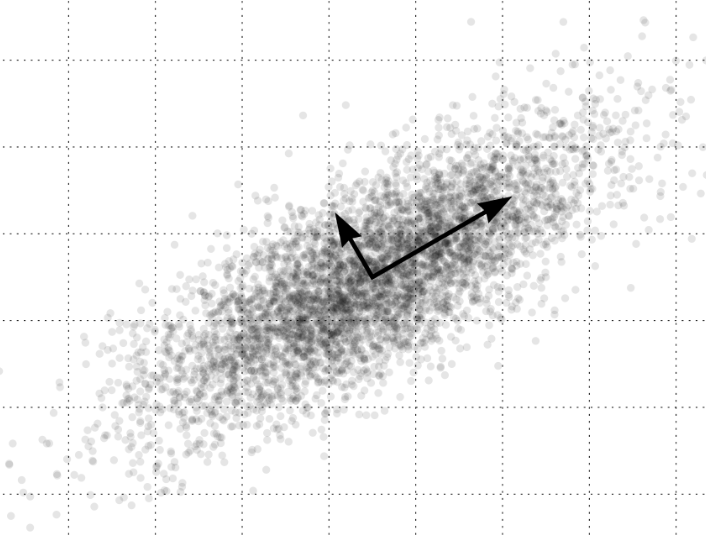

In [4]:
from IPython import display
display.Image("pca.png", width="500", height="300")

<h4> 
PCA as a method of visualizing high-dimensional data

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [6]:
pca = PCA(2)
digits2d = pca.fit_transform(digits.data) #reducte 64 features to 2
print(digits2d.shape)

(1797, 2)


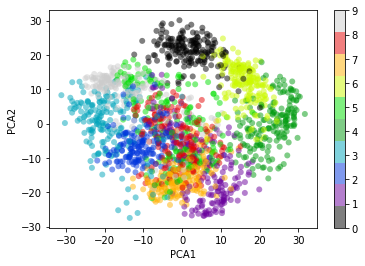

In [7]:
plt.scatter(digits2d[:,0], digits2d[:,1],
            c = digits.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()


<h4> How much information is left?

In [8]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [9]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('Eigenvalues \n%s'% eigen_vals)
# eigen_vecs

Eigenvalues 
[4.80831621 2.60374779 1.37087288 0.89730848 0.89417853 0.61503055
 0.52428622 0.09986474 0.36400572 0.1628064  0.30351535 0.23651936
 0.22610515]


In [10]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp) # stepping-sum

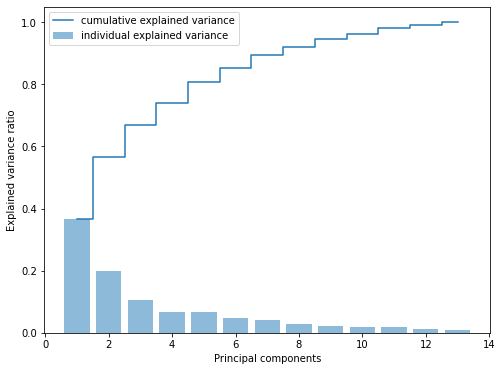

In [11]:
plt.figure(figsize=(8,6))
plt.bar( range(1, 14), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 14), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [12]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs[0:2]

[(4.808316207963479,
  array([ 0.11764947, -0.27125589, -0.00287842, -0.2187704 ,  0.11381354,
          0.3883771 ,  0.41798859, -0.30781073,  0.31891453, -0.09956432,
          0.31677259,  0.38268756,  0.27026597])),
 (2.60374779369791,
  array([-0.48449198, -0.22537291, -0.37849214, -0.00424088, -0.29832137,
         -0.08395627, -0.03573104, -0.05530974, -0.03466028, -0.51335364,
          0.21549584,  0.13494201, -0.37608379]))]

In [13]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)


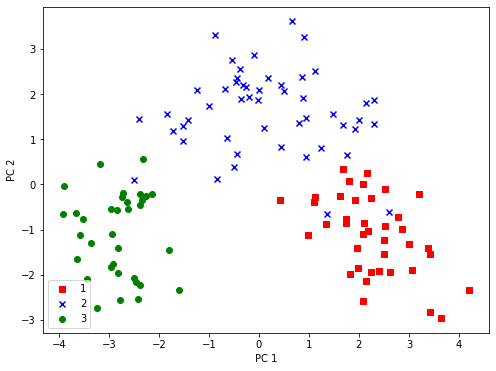

In [14]:
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Of course it's all implemented :)


In [15]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3668634 , 0.19865993, 0.10459443, 0.06846256, 0.06822375,
       0.04692541, 0.04000183, 0.02777279, 0.02315752, 0.01804588,
       0.0172513 , 0.01242175, 0.00761945])

In [16]:
print(pca.components_[:3]) #three frist components

[[ 0.11764947 -0.27125589 -0.00287842 -0.2187704   0.11381354  0.3883771
   0.41798859 -0.30781073  0.31891453 -0.09956432  0.31677259  0.38268756
   0.27026597]
 [-0.48449198 -0.22537291 -0.37849214 -0.00424088 -0.29832137 -0.08395627
  -0.03573104 -0.05530974 -0.03466028 -0.51335364  0.21549584  0.13494201
  -0.37608379]
 [-0.22676228  0.0915252   0.56611151  0.66946119  0.14770786  0.15502807
   0.14704292  0.07138073  0.04901835 -0.18399456  0.08151526  0.17418972
  -0.16040494]]


We usually take the number of components so that the total explained variance is at least 80-90\%

## Exercise1: Is it possible that the first two components explain 100% of the variance of the 5D data? If not - prove, if yes - give an example.

It is possible. If there is no variance in each individual class (for example all data points in a given class have the same value) then PCA will find that the first component explain 100% of the variance. 

The first principal component (PC1) will capture the direction of maximum variance, which is the direction along which the data points vary the most. In this case, PC1 will have equal loadings for all five dimensions since they all have the same variance (zero variance). PC1 will account for all the variance in the dataset.

The second principal component (PC2) will be orthogonal to PC1 and will capture the remaining variance. Since PC1 already accounts for all the variance, PC2 will have zero variance and will also explain 0% of the variance.

The second example would be - we have two different columns of data and the rest is a simple combination of these two columns.

## Exercise2: Consider the $iris$ data. Standardize it and then run the PCA algorithm. How many components describe this data well enough? Build SVM classifier on new set of features (reduced). Comment your results.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [3]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components explaining at least 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Number of components explaining 95% of the variance:", n_components)

Number of components explaining 95% of the variance: 2


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :n_components], y, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM classifier:", accuracy)

Accuracy of the SVM classifier: 0.9


The number of components needed to describe the data well enough was 2. They are sufficient to capture a significant portion of the variance (95%). The accuracy of this classification is satisfactory.

## Exercise 3: Consider again the face data of different people (fetch_lw_people) considered during the SVM exercise. Apply the same as then PCA with 150 components. What percentage of variance do these components describe? Draw some initial components (eigenvectors); of course, like the images, they are $64\cdot47$ dimensional vectors - you need to use the reshape method before drawing. Consider their interpretation.

Percentage of variance explained by the components: 93.59188079833984


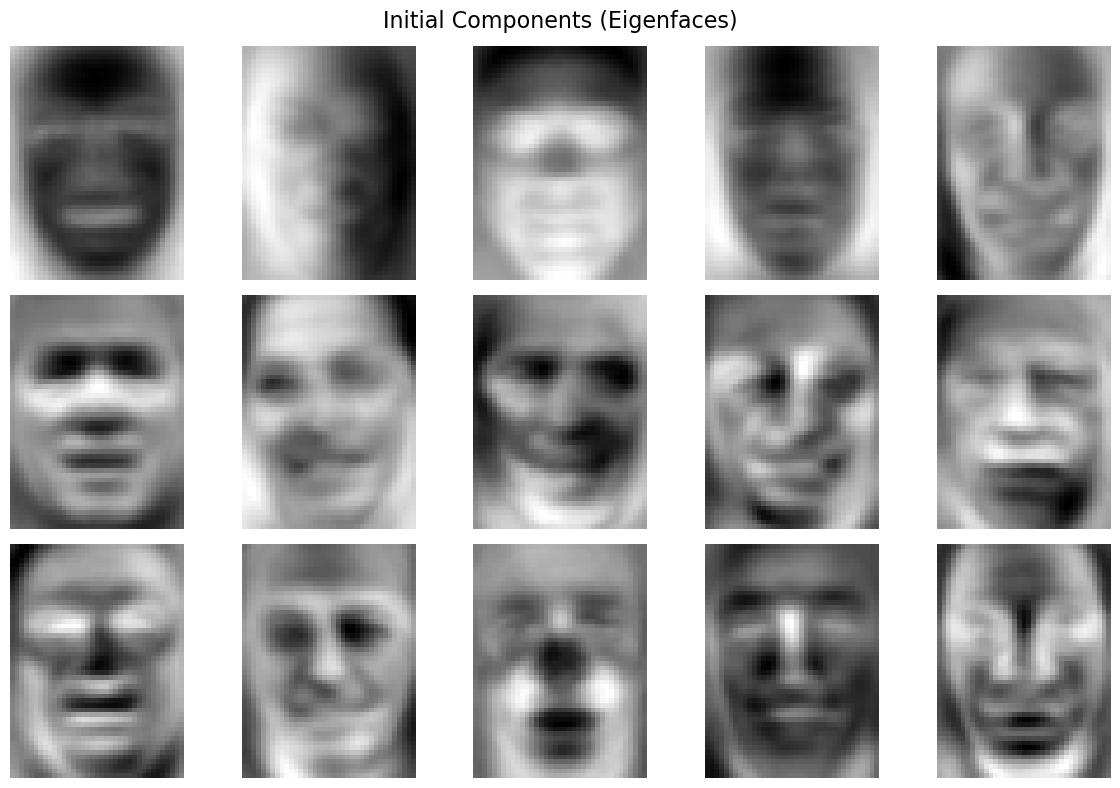

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

faces = fetch_lfw_people(min_faces_per_person=20, resize=0.4)

scaler = StandardScaler()
faces_scaled = scaler.fit_transform(faces.data)

n_components = 150
pca = PCA(n_components=n_components)
faces_pca = pca.fit_transform(faces_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
total_variance_ratio = np.sum(explained_variance_ratio)

print("Percentage of variance explained by the components:", total_variance_ratio * 100)

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle('Initial Components (Eigenfaces)', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    eigenface = pca.components_[i].reshape(faces.images[0].shape)
    ax.imshow(eigenface, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

This model explained variance very well - 93.6%. When we look at the pictures we can distinguish face features well. They would be sufficient to perform further analysis.

In [15]:
x = np.array([1,2,3,4,5,6])
print(x.reshape(3,2))

[[1 2]
 [3 4]
 [5 6]]


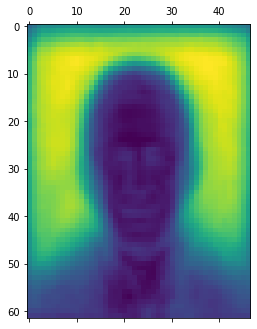

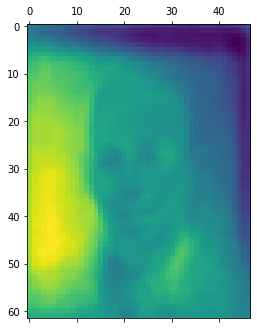

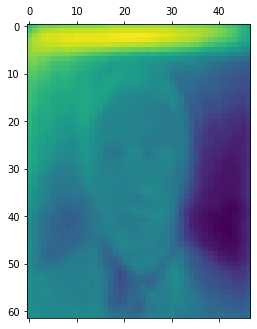

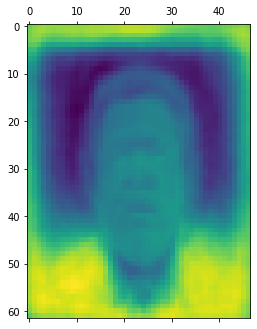

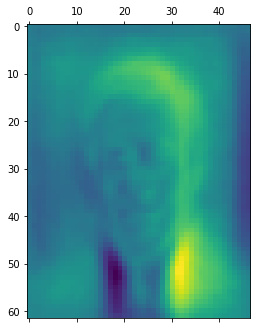

In [17]:
#this is how components should look like

<h3> PCA with kernel

<h4> Example1

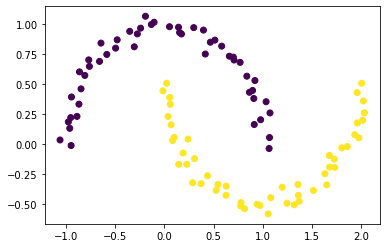

In [18]:
X, y = make_moons(n_samples=100, random_state=123, noise = 0.05)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [19]:
pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)

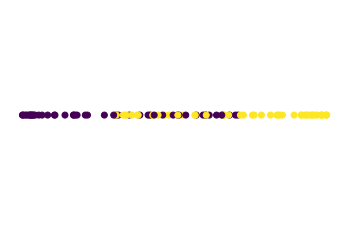

In [20]:
z = np.ones(np.shape(Xpca))
plt.scatter(Xpca,z, c = y)
plt.axis("off")
plt.show()

<h4> Example2

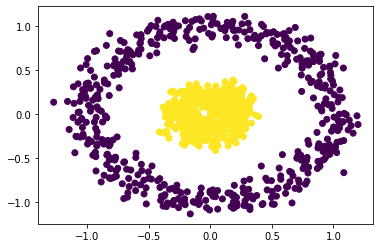

In [21]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

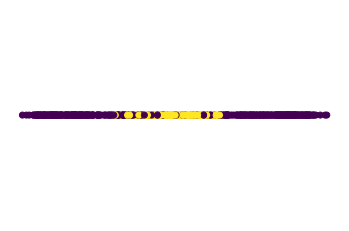

In [22]:
pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)

z = np.ones(np.shape(Xpca))
plt.scatter(Xpca,z, c = y)
plt.axis("off")
plt.show()

In [23]:
#we can deal with the second example
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
Xpcakernel = scikit_kpca.fit_transform(X)

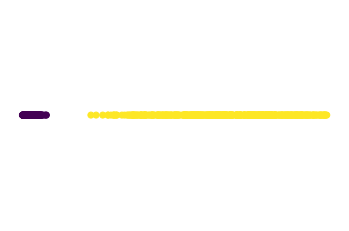

In [24]:
z = np.ones(np.shape(Xpcakernel))
plt.scatter(Xpcakernel,z, c = y)
plt.axis("off")
plt.show()

<h3> ICA

- We assume that we have a linear mixture of independent signals (e.g. voices of several people speaking simultaneously; the so-called cocktail party problem). The goal: to find these (original) signals


<center> $x=As$

$A$ - mixing matrix (unknown), $s$ - original signals (uknonwn), $x$ - observed (known)

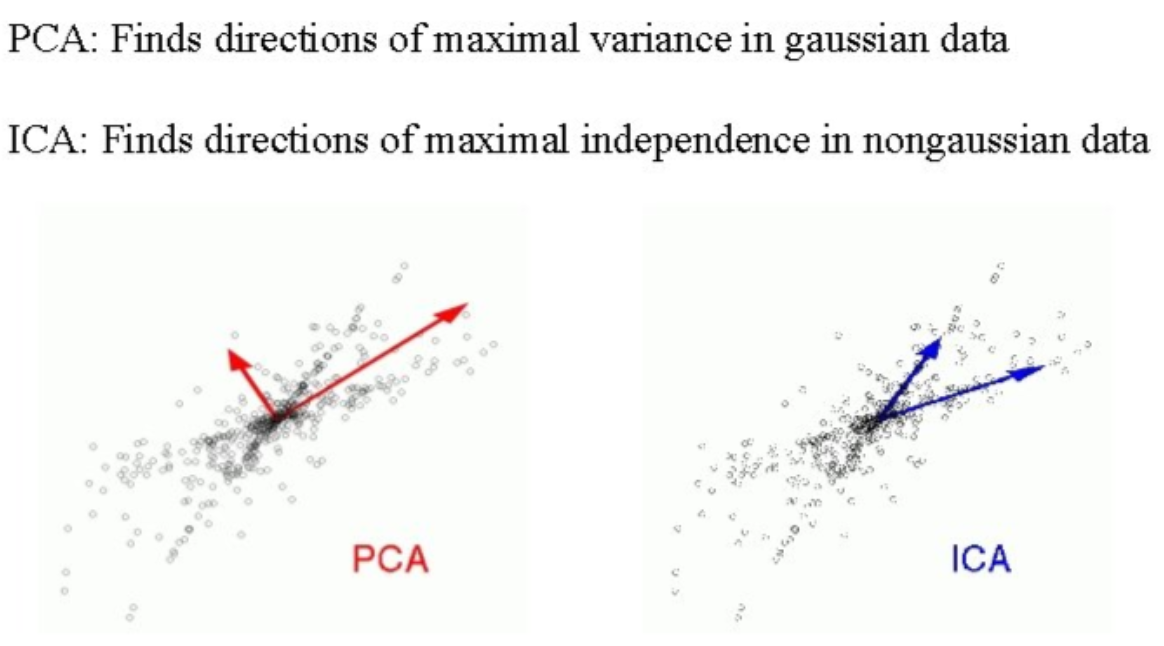

In [41]:
display.Image("icapca.png", width="800", height="500")

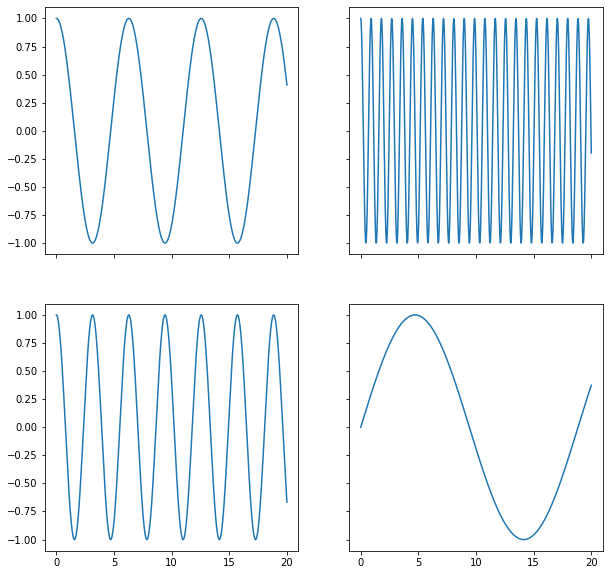

In [26]:
n = 1000
x = np.linspace(0, 20, n)
y1 = np.cos(x)
y2 = np.cos(2*x)
y3 = np.sin(x/3)
y4 = np.cos(7*x)

fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,y1)
ax[1,0].plot(x,y2)
ax[1,1].plot(x,y3)
ax[0,1].plot(x,y4)

plt.show()

[[0.81863762 0.88151342 0.59348204 0.30458579]
 [0.31974515 0.85550974 0.76736996 0.71922131]
 [0.17197666 0.43171669 0.53259677 0.54710688]
 [0.60230064 0.70229782 0.36402125 0.30922967]]


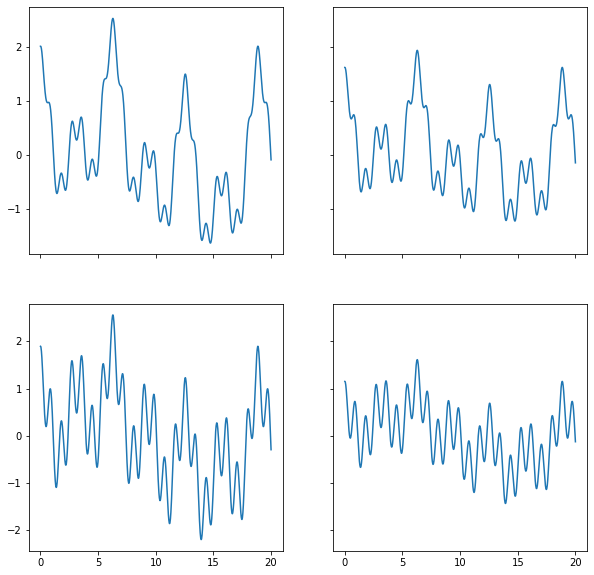

In [27]:
#create mixtures

A = np.random.rand(4,4)

print(A)

z1 = A[0][0]*y1+A[0][1]*y2+A[0][2]*y3+A[0][3]*y4
z2 = A[1][0]*y1+A[1][1]*y2+A[1][2]*y3+A[1][3]*y4
z3 = A[2][0]*y1+A[2][1]*y2+A[2][2]*y3+A[2][3]*y4
z4 = A[3][0]*y1+A[3][1]*y2+A[3][2]*y3+A[3][3]*y4

fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,z1)
ax[1,0].plot(x,z2)
ax[1,1].plot(x,z3)
ax[0,1].plot(x,z4)

plt.show()

In [28]:
X = pd.DataFrame({"z1":z1, "z2":z2, "z3":z3, "z4":z4})

In [29]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components = 4, whiten = "arbitrary-variance")
ica.fit(X)
y_ica = ica.transform(X)

In [30]:
print(ica.mixing_)

[[  7.08870652  13.20756099  18.97676942 -19.67706089]
 [ 16.31945796  16.87076274  18.45624731  -8.44390812]
 [ 12.35009284  11.69722421   9.21897087  -4.51612157]
 [  7.13198178   8.14530991  15.11340895 -14.5577814 ]]


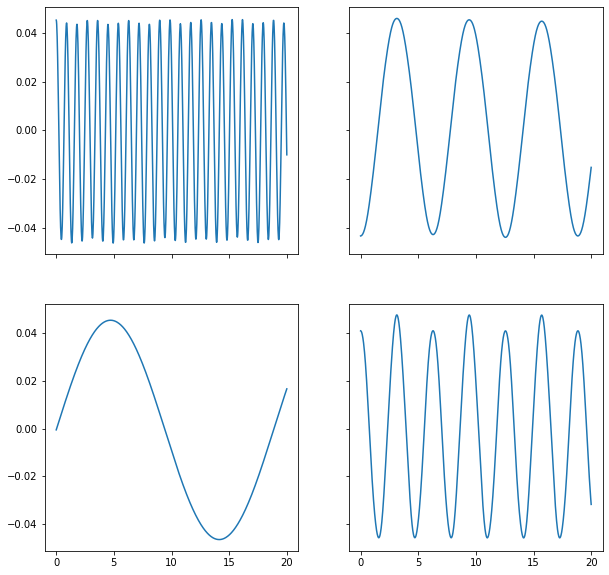

In [31]:
fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,y_ica[:,0])
ax[1,0].plot(x,y_ica[:,1])
ax[1,1].plot(x,y_ica[:,2])
ax[0,1].plot(x,y_ica[:,3])

plt.show()

## Exercise4: Notice that these plots differ in the range of values compared to original signals - is that understandable?

While ICA can successfully extract the independent components, it cannot determine their absolute amplitudes without additional information. This limitation arises because ICA only considers the statistical properties of the sources and their mixtures. It cannot distinguish between scaling factors applied to the sources, which affect their amplitudes.
Namely, since both A and s in equation x = As are unknown, introducing any factor to amplitude A, meanwhile reducing the same factor to s, will give the same fit to the data. We cannot distinguish which combination of A and S is suitable and it affects the amplitude.

How to use it for dimensionality reduction?

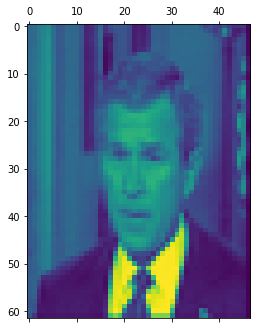

In [32]:
plt.matshow(faces.data[1].reshape(62,47))
plt.show()

In [33]:
ica.mixing_

array([[  7.08870652,  13.20756099,  18.97676942, -19.67706089],
       [ 16.31945796,  16.87076274,  18.45624731,  -8.44390812],
       [ 12.35009284,  11.69722421,   9.21897087,  -4.51612157],
       [  7.13198178,   8.14530991,  15.11340895, -14.5577814 ]])

In [34]:
ica.mixing_

array([[  7.08870652,  13.20756099,  18.97676942, -19.67706089],
       [ 16.31945796,  16.87076274,  18.45624731,  -8.44390812],
       [ 12.35009284,  11.69722421,   9.21897087,  -4.51612157],
       [  7.13198178,   8.14530991,  15.11340895, -14.5577814 ]])

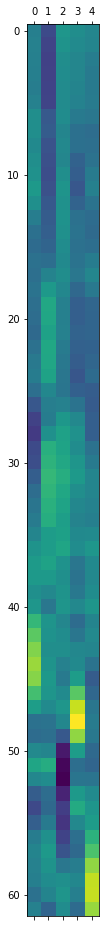

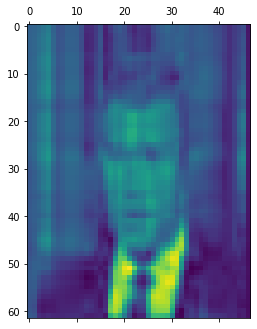

In [35]:
ica = FastICA(n_components = 5, whiten = "arbitrary-variance")
ica.fit(faces.data[1].reshape(62,47))

plt.matshow(ica.fit_transform(faces.data[1].reshape(62,47)))

image_restored = ica.inverse_transform(ica.fit_transform(faces.data[1].reshape(62,47)))

plt.matshow(image_restored)
plt.show()

Comment: the columns in the picture are a linear combination of these 5 independent vectors


ICA application:
- processing of medical signals (fMRI, ECG, EEG)
- Brain Computer Interface
- time series analysis (e.g. in finance)

and many others

<h3> Supplementary material

PCA performs worse with non-linear relationships. The solution is a class of methods considering the so-called manifolds (manifold learning). The goal is the same, low-dimensional representation of high-dimensional data.


Examples: Multidimensional scaling (MDS), locally linear embedding (LLE), isometric mapping (IsoMap)

There are also methods that take into account information about classes (if known)


<h4> Linear Discriminant Analysis (LDA) - supervised learning

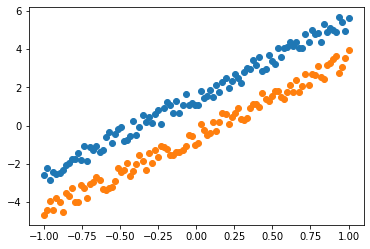

In [36]:
rng = np.random.RandomState(1)
x = np.linspace(-1, 1, 100)
y1 = 4*x+1+rng.random(100)
y2 = 4*x-1+rng.random(100)

X = np.array((np.append(x, x),np.append(y1, y2))).T
label = np.array([0]*100+[1]*100)
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.show()

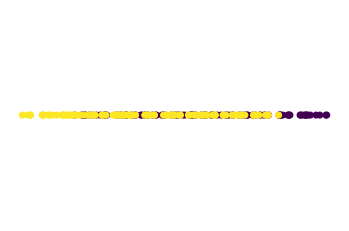

In [37]:
#PCA

pca = PCA(1)
X1dpca = pca.fit_transform(X) 

z = np.ones(np.shape(X1dpca))
plt.scatter(X1dpca,z, c = label)
plt.axis("off")
plt.show()

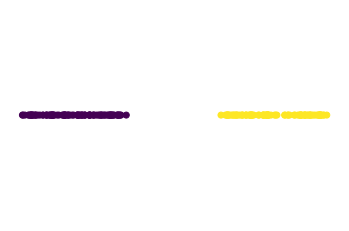

In [38]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X1dlda = lda.fit_transform(X, label)

z = np.ones(np.shape(X1dlda))
plt.scatter(X1dlda,z, c = label)
plt.axis("off")
plt.show()